# Explore output h5 file of PRISM software

In [9]:
import h5py
import os
import numpy as np
import py4DSTEM
from py4DSTEM.visualize import show
import matplotlib.pyplot as plt
import yaml

Use py4DSTEM python module to read the data. The `check_config()` function is helpful to make sure the library is installed correctly. For now, the first line shoul dsay "all Dependencies for Base are Installed". You can igmore the rest

In [10]:
py4DSTEM.check_config()

Checking Module Dependencies
 All Dependencies for Base are Installed 
 Not All Dependencies for Ipyparallel are Installed
 Not All Dependencies for Cuda are Installed
 All Dependencies for Acom are Installed 
 Not All Dependencies for Aiml are Installed
 Not All Dependencies for Aiml-cuda are Installed
 Not All Dependencies for Numba are Installed


Choose an h5 file to open and explore

In [11]:
material_id = "mp-5229"
rotation_axis = "1_0_0"
angle = 0
combo = 0
filename = f"../prism_output_files/{material_id}_{rotation_axis}_angle_{angle}_combo_{combo}.h5"

plot_dir = '../prism_output_plots'


In [12]:
# parse maaterial name and rotation axis and angle
bname = os.path.basename(filename)
slist = bname.split('_')

with open('../materials_map.yml', 'r') as f:
    mat_map = yaml.safe_load(f)
formula = mat_map[material_id]['pretty_formula']



rotation_axis = [int(i) for i in slist[1:4]]
rotation_string = f"[{rotation_axis[0]}{rotation_axis[1]}{rotation_axis[2]}]"
angle = int(slist[-1].split('.')[0])


plt_title = f"{formula} {rotation_string} {angle} deg"
plt_fname = f"{bname.split('.')[0]}.png"

The `print_h5_tree` function prints the structure of the h5 simulation

In [13]:
py4DSTEM.io.print_h5_tree(filename)

/
|--4DSTEM_simulation
	|--data
	|	|--counted_datacubes
	|	|--datacubes
	|	|	|--CBED_array_depth0000
	|	|--diffractionslices
	|	|--pointlistarrays
	|	|--pointlists
	|	|--realslices
	|	|	|--DPC_CoM_depth0000
	|	|	|--annular_detector_depth0000
	|	|	|--ppotential_fp0000
	|	|	|--ppotential_fp0001
	|	|	|--ppotential_fp0002
	|	|	|--ppotential_fp0003
	|	|	|--ppotential_fp0004
	|	|	|--ppotential_fp0005
	|	|	|--ppotential_fp0006
	|	|	|--ppotential_fp0007
	|	|	|--virtual_detector_depth0000
	|	|--supergroups
	|--log
	|--metadata
		|--metadata_0
			|--calibration
			|--comments
			|--microscope
			|--original
			|	|--all
			|	|--shortlist
			|	|--simulation_parameters
			|--sample
			|--user




Read in the file. This will show the data shape of the different structures. Descriptions fo the various outputs can be found here: https://prism-em.com/docs-outputs/

In [14]:
py4DSTEM.io.read(filename)

py4DSTEM file version 0.9.0
Index     Type              Shape                   Name                                                  
-----     ----              -----                   ----                                                  
  0       DataCube          (79, 79, 40, 40)        CBED_array_depth0000                                  
  1       RealSlice         (79, 79, 2)             DPC_CoM_depth0000                                     
  2       RealSlice         (79, 79)                annular_detector_depth0000                            
  3       RealSlice         (160, 160, 49)          ppotential_fp0000                                     
  4       RealSlice         (160, 160, 49)          ppotential_fp0001                                     
  5       RealSlice         (160, 160, 49)          ppotential_fp0002                                     
  6       RealSlice         (160, 160, 49)          ppotential_fp0003                                     
  7      

The `annular_detector_depth0000` data_id is the 2D simulation of the detected image from the electron microscope. The 2D simulation (`angular_detect`)is comprised of floating point numbers. The X and Y dimensions indicate the probe positions


In [15]:
angular_detect = py4DSTEM.io.read(filename, data_id='annular_detector_depth0000')

In [16]:
type(angular_detect)

py4DSTEM.io.datastructure.py4dstem.realslice.RealSlice

In [17]:
angular_detect.data

array([[0.00652867, 0.00498303, 0.00289441, ..., 0.00281779, 0.0043848 ,
        0.00642053],
       [0.00498303, 0.00393132, 0.00271343, ..., 0.00278334, 0.00355637,
        0.00490978],
       [0.0028944 , 0.00271343, 0.00291125, ..., 0.00316747, 0.00271553,
        0.0028828 ],
       ...,
       [0.00281779, 0.00278334, 0.00316747, ..., 0.003424  , 0.00284206,
        0.00281667],
       [0.0043848 , 0.00355637, 0.00271553, ..., 0.00284206, 0.00328067,
        0.00432744],
       [0.00642053, 0.00490979, 0.0028828 , ..., 0.00281667, 0.00432744,
        0.00631488]], dtype=float32)

The `py4DSTEM.visualize.show()` function visualizes the data array. It has a lot of functionality (see function defintion at https://py4dstem.readthedocs.io/en/latest/api/visualize.html#show)

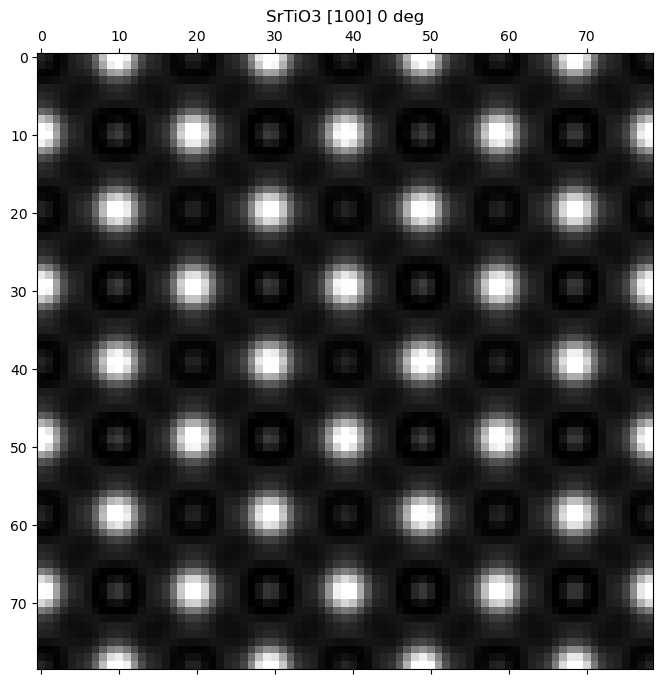

In [18]:
fig, ax = show(angular_detect, title=f'{plt_title}', returnfig=True)
plt.savefig(fname=os.path.join(plot_dir, plt_fname))

You can adjust the scaling of the image

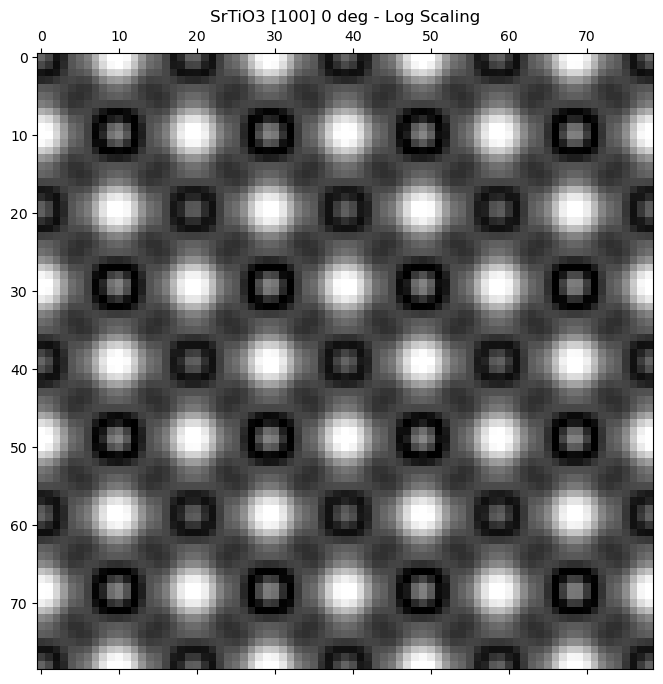

In [19]:
fig, ax = show(angular_detect, scaling='log',title=f'{plt_title} - Log Scaling', returnfig=True)
plt.savefig(fname=os.path.join(plot_dir, f"log_{plt_fname}"))

You can also show a histogram of the data as well

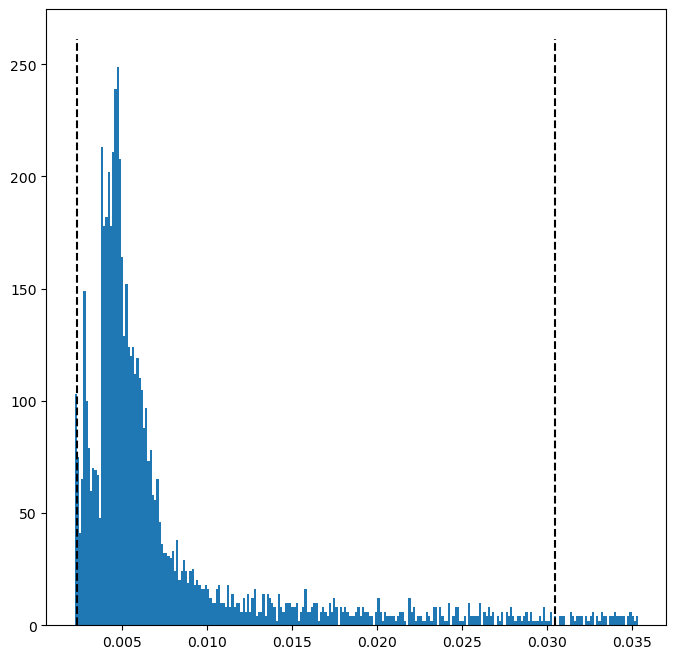

In [20]:
show(angular_detect, hist=True)

The `virtual_detector` is a 3D array that represents a radially integrated output. Like above, the first 2 dimensions represent the probe position. The last dimension represents the detection angles of the of the probe

In [21]:
virtual_detector = py4DSTEM.io.read(filename, data_id="virtual_detector_depth0000")

In [22]:
virtual_detector

RealSlice( A stack of 92 Arrays with 2-dimensions and shape (79, 79), called 'virtual_detector_depth0000'

           The labels are:
               0.5
               1.5
               2.5
               3.5
               4.5
               5.5
               6.5
               7.5
               8.5
               9.5
               10.5
               11.5
               12.5
               13.5
               14.5
               15.5
               16.5
               17.5
               18.5
               19.5
               20.5
               21.5
               22.5
               23.5
               24.5
               25.5
               26.5
               27.5
               28.5
               29.5
               30.5
               31.5
               32.5
               33.5
               34.5
               35.5
               36.5
               37.5
               38.5
               39.5
               40.5
               41.5
               42.5
               4

We visaulize a slice of the 3D array

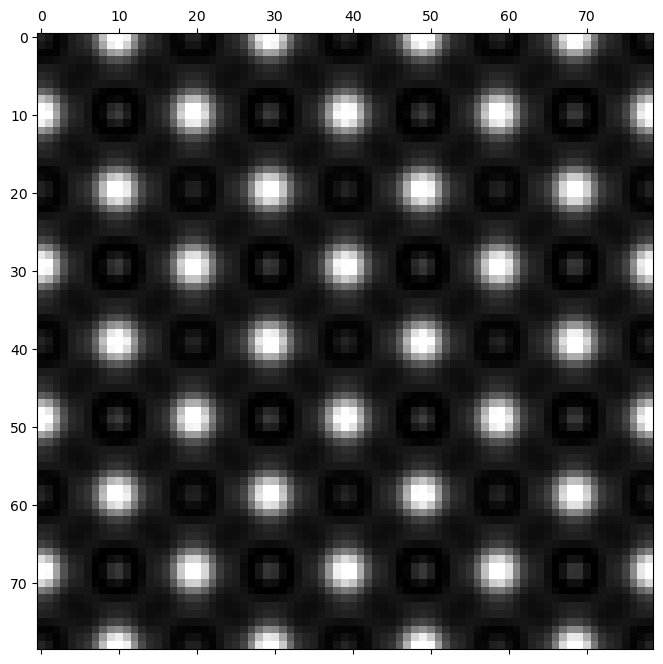

In [35]:

slice = virtual_detector.data[:, :, 0]
show(slice)

We can also visualiz sum of integrated angles, simulating the sliders selecting virtual inner and outer angles in the PRSIM gui


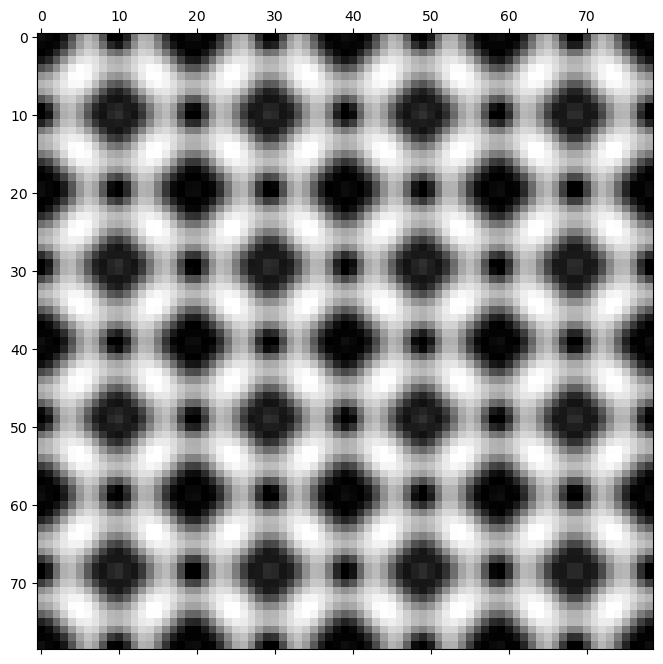

In [40]:
inner_angle = 20
outer_angle = 40
virtual_detected = virtual_detector.data[:, :, inner_angle:outer_angle]
sum_slice = np.sum(virtual_detected, axis=-1)

show(sum_slice)

The `CBED_array_depth0000` data_id is a 4D array. The first two indices correspond to real space, which is why they are labeled Rx and Ry. The second two indices correspond to diffraction space, and thus are labeled Qx and Qy. Currently, we have provided no calibration or pixel sizes to this datacube, which is why the units are in pixels and start at 0 with a step of 1.

In [24]:
datacube = py4DSTEM.io.read(filename, data_id="CBED_array_depth0000")

In [25]:
datacube

DataCube( A 4-dimensional array of shape (79, 79, 40, 40) called 'CBED_array_depth0000',
          with dimensions:

              Rx = [0,1,...] pixels
              Ry = [0,1,...] pixels
              Qx = [0,1,...] pixels
              Qy = [0,1,...] pixels

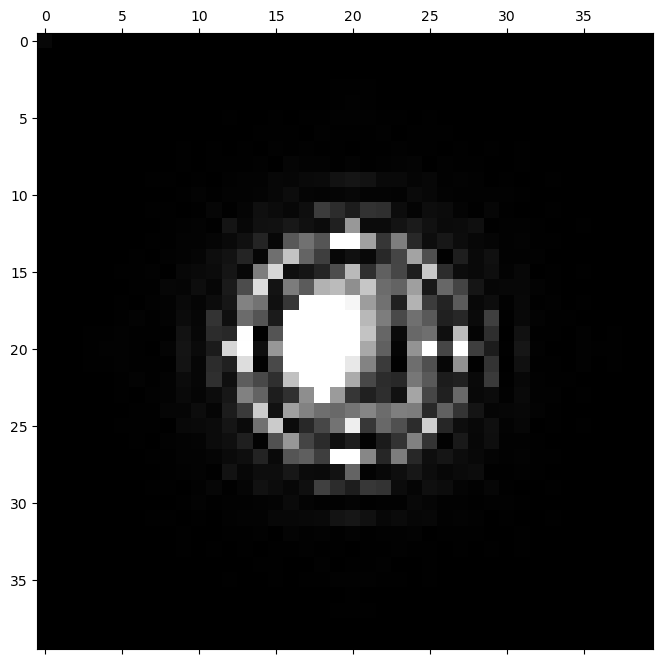

In [26]:
dp = datacube.data[10,30]
show(dp)

Warning, vmin not provided, setting minimum intensity = 8.706053e-10
Warning, vmax not provided, setting maximum intensity = 0.019197645


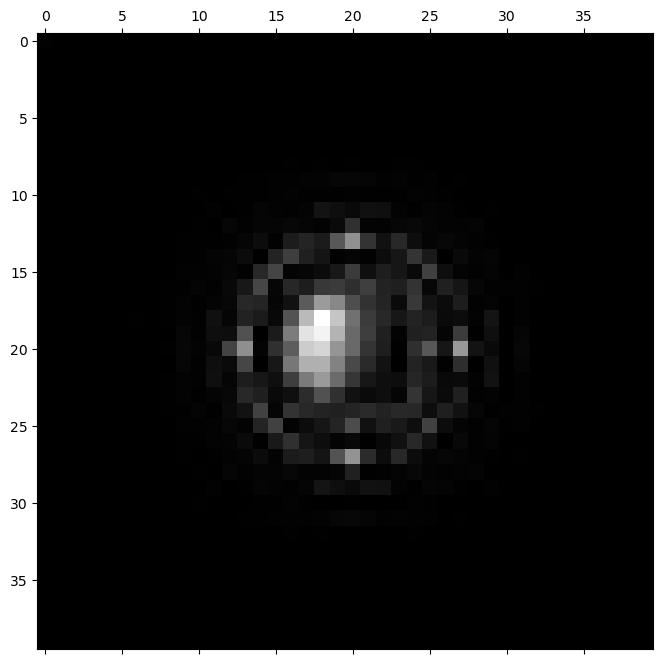

In [27]:
py4DSTEM.visualize.show(
    dp,
    intensity_range='absolute')

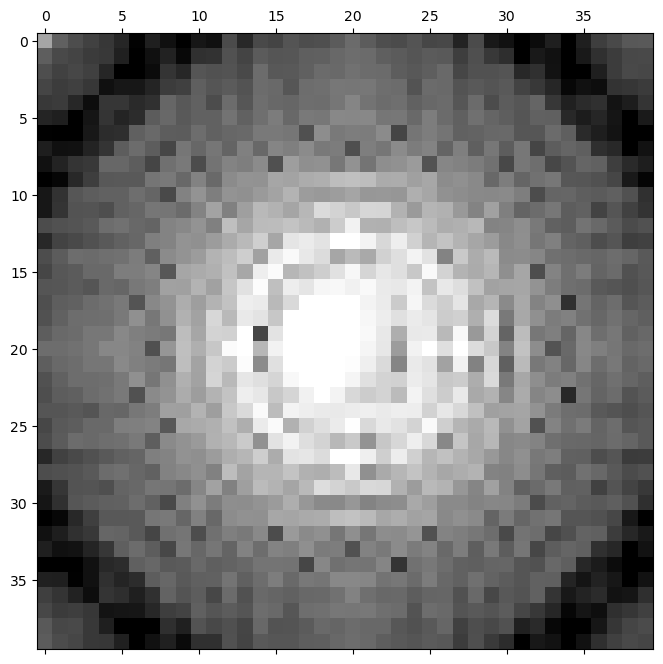

In [28]:
py4DSTEM.visualize.show(
    dp,
    scaling='log',
)

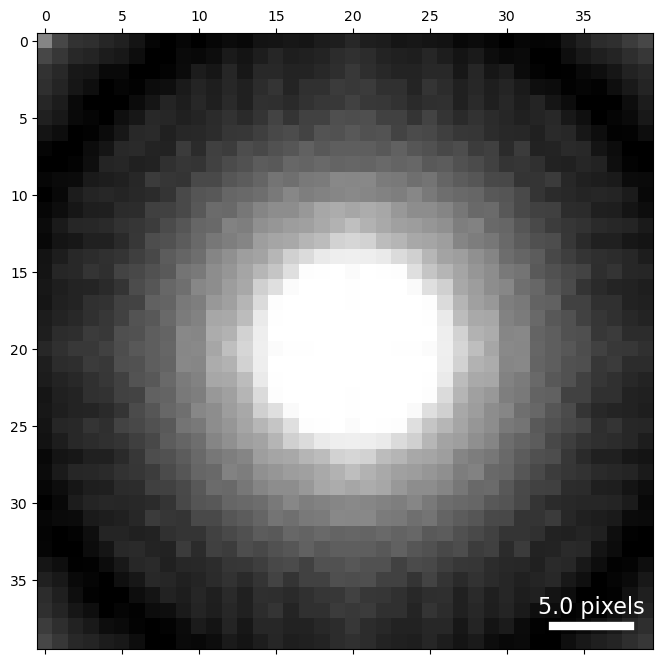

In [29]:
datacube.get_dp_mean()

# Plot the mean diffraction pattern:
py4DSTEM.visualize.show(
    datacube.tree['dp_mean'],
    scaling='log'
)

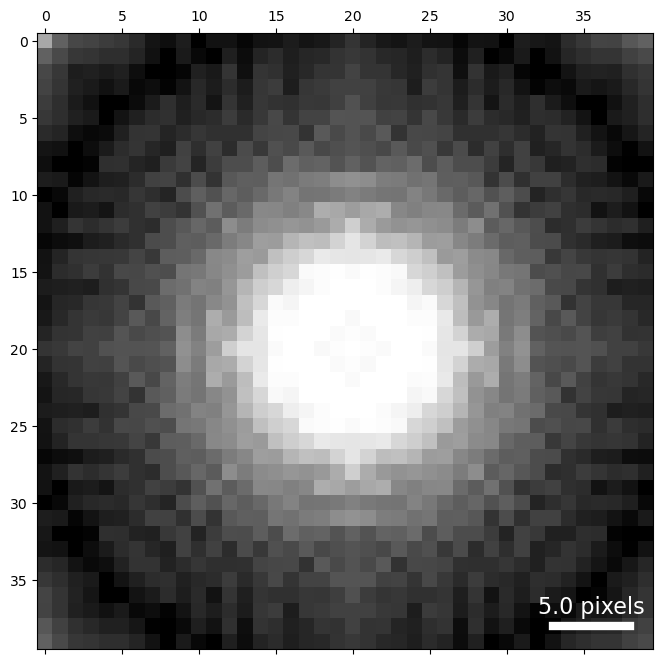

In [30]:
# Calculate maximum diffraction pattern:
datacube.get_dp_max()

# Plot the maximum diffraction pattern:
py4DSTEM.visualize.show(
    datacube.tree['dp_max'],
    scaling='log'
)

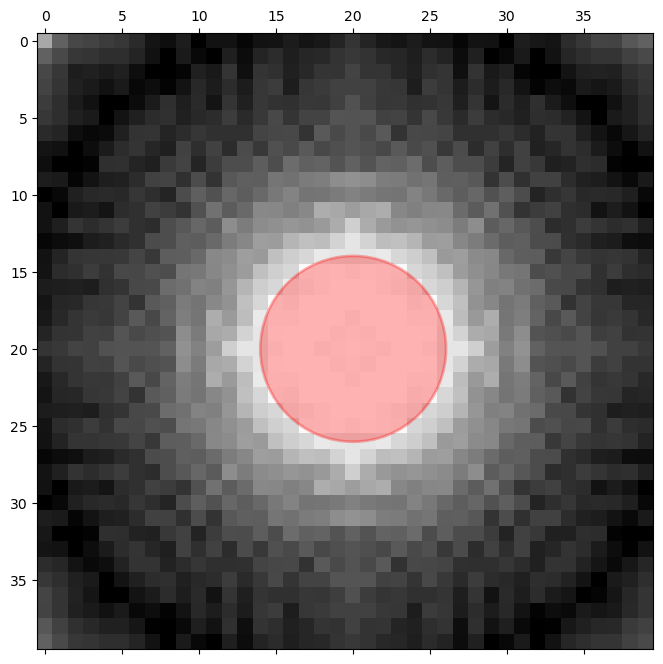

Estimated probe radius = 6.03 pixels


In [31]:

# Estimate the radius of the BF disk, and the center coordinates
probe_semiangle, probe_qx0, probe_qy0 = py4DSTEM.process.calibration.get_probe_size(
    datacube.tree['dp_mean'].data,
)

# Overlay the estimated probe position and radius on the maximum diffraction pattern
py4DSTEM.visualize.show(
    datacube.tree['dp_max'].data, 
    scaling='log',
    circle = {
      'center':(probe_qx0, probe_qy0),
      'R': probe_semiangle,
      'alpha':0.3,
      'fill':True
    }
)

# Print the estimate probe radius
print('Estimated probe radius =', '%.2f' % probe_semiangle, 'pixels')

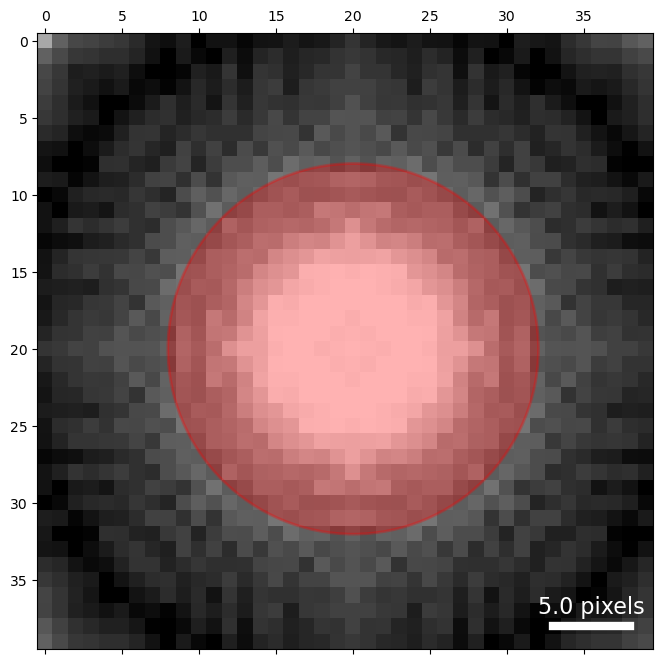

In [32]:
# Create a bright field (BF) virtual detector using the the center beam position, and expanding the radius slightly.
expand_BF = 6.0

# Overlay the estimated probe position and radius on the maximum diffraction pattern
py4DSTEM.visualize.show(
    datacube.tree['dp_max'], 
    scaling='log',
    circle = {
      'center':(probe_qx0, probe_qy0),
      'R': probe_semiangle + expand_BF,
      'alpha':0.3,
      'fill':True
    }
)

100%|██████████| 6241/6241 [00:00<00:00, 72752.73it/s]


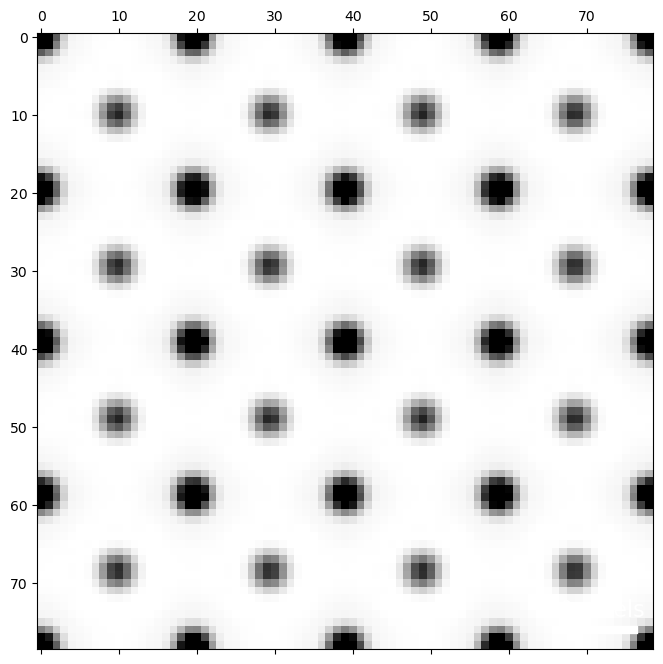

In [33]:
# EC: I **think** this is what we want (atleast image wise?)
# Using this virtual detector, capture and display a BF image
center = (probe_qx0, probe_qy0)
radius = probe_semiangle + expand_BF

datacube.get_virtual_image(
    mode = 'circle',
    geometry = (center,radius),
    name = 'bright_field',
)

# plot the bright field image which is now stored in the `tree` of datacube
py4DSTEM.visualize.show(datacube.tree['bright_field'])

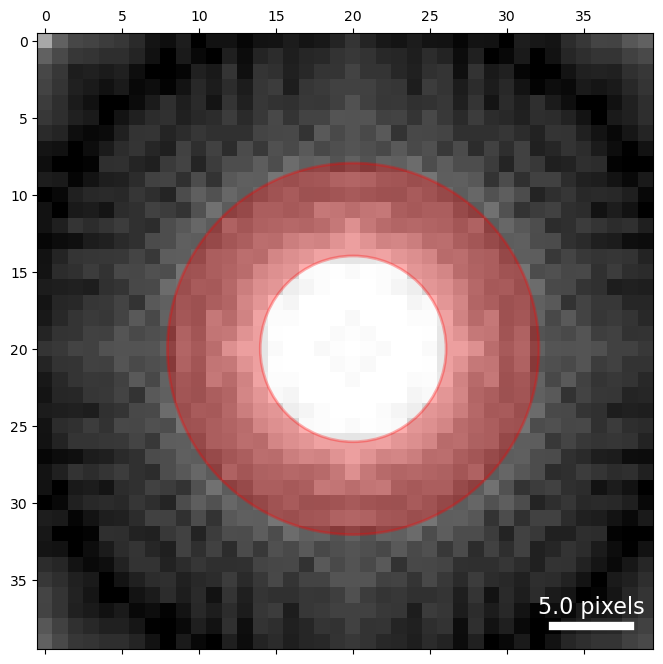

In [34]:
# Create an annular dark field (ADF) virtual detector using the the center beam position, and expanding the radius slightly.
r_inner = probe_semiangle * 1
r_outer = probe_semiangle * 2

# Show the ADF detector
py4DSTEM.visualize.show(
    datacube.tree['dp_max'], 
    scaling='log',
    annulus = {
      'center':(probe_qx0, probe_qy0),
      'radii':(r_inner, r_outer),
      'alpha':0.3,
      'fill':True
    }
)